In [1]:
import numpy as np
import os
from PIL import Image
import torch
from torch import nn
from torchvision import models, utils
from torch.utils.data import Dataset, SubsetRandomSampler, Sampler
import matplotlib.pyplot as plt

from dataset import Fruits
from utils import visualize_samples, predicting_fruit

%matplotlib inline
device = torch.device("cuda:0")

In [2]:
load_folder = "demonstration/"   # Из этой папки будут загружаться изображения для примера.

fruit_list = {0:'Apple', 1:'Banana', 2:'Carambola', 3:'Guava',
              4:'Kiwi', 5:'Mango', 6:'Muskmelon', 7:'Orange', 8:'Peach',
              9:'Pear', 10:'Persimmon', 11:'Pitaya', 12:'Plumу',
              13:'Pomegranet', 14:'Tomato', 15:'Not a fruit'}   # Словарь со всеми значениями классов.

In [3]:
model = models.resnet18(pretrained=False)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 16)
model.load_state_dict(torch.load('model_resnet18_comp.sh'))  #Загружаем сохраненные веса натренированной модели.
model = model.to(device)

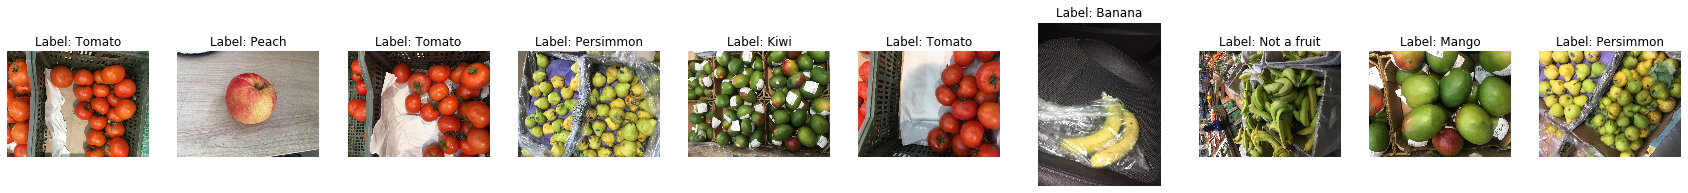

In [5]:
# Выводим изображения с предсказанными моделью классами.
prediction = predicting_fruit(model, folder=load_folder, title_list=fruit_list)